In [11]:
import pandas as pd
import numpy as np

import requests
from urllib.parse import urlencode

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import chi2_contingency, chi2 
import scipy.stats as stats
import pingouin as pg 
import pandahouse as ph 

import warnings
warnings.filterwarnings('ignore')

# Задание 1. A/B–тестирование

### Считываем исходные данные:

In [12]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_groups.csv', sep=';')
group_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_group_add.csv')
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_checks.csv', sep=';')
activity = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_active_studs.csv')

### Считывание данных с использованием API:

In [13]:
groups_url = 'https://disk.yandex.ru/d/UhyYx41rTt3clQ'
group_add_url = 'https://disk.yandex.ru/d/5Kxrz02m3IBUwQ'
checks_url = 'https://disk.yandex.ru/d/pH1q-VqcxXjsVA'
activity_url = 'https://disk.yandex.ru/d/Tbs44Bm6H_FwFQ'

In [14]:
def get_url(public_key):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
    
    final_url = base_url + urlencode(dict(public_key=public_key))
    response = requests.get(final_url)
    download_url = response.json()['href']
    
    download_response = requests.get(download_url)
    if public_key == group_add_url:
        df = pd.read_csv(download_url, sep=',')
    else:
        df = pd.read_csv(download_url, sep=';')
    return df 

In [ ]:
groups = get_url(public_key=groups_url)
group_add = get_url(public_key=group_add_url)
checks = get_url(public_key=checks_url)
activity = get_url(public_key=activity_url)

### Рассмотрим все данные подробнее

### groups 

In [17]:
groups.head()

,id,grp
0,1489,B
1,1627,A
2,1768,B
3,1783,B
4,1794,A


In [18]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74484 entries, 0 to 74483
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      74484 non-null  int64 
 1   grp     74484 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [19]:
groups.shape

(74484, 2)

In [20]:
groups.isna().sum()

id     0
grp    0
dtype: int64

In [21]:
groups.duplicated().sum()

0

### group_add

In [22]:
group_add.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [23]:
group_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      92 non-null     int64 
 1   grp     92 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [24]:
group_add.shape

(92, 2)

In [25]:
group_add.isna().sum()

id     0
grp    0
dtype: int64

In [26]:
group_add.duplicated().sum()

0

### checks

In [27]:
checks.head()

,student_id,rev
0,1627,990.0
1,3185,690.0
2,25973,690.0
3,26280,690.0
4,100300,990.0


In [28]:
checks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  541 non-null    int64  
 1   rev         541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [29]:
checks.shape

(541, 2)

In [30]:
checks.isna().sum()

student_id    0
rev           0
dtype: int64

In [31]:
checks.duplicated().sum()

0

### activity

In [32]:
activity.head()

,student_id
0,581585
1,5723133
2,3276743
3,4238589
4,4475369


In [33]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   student_id  8341 non-null   int64
dtypes: int64(1)
memory usage: 65.3 KB


In [34]:
activity.shape

(8341, 1)

In [35]:
activity.isna().sum()

student_id    0
dtype: int64

In [36]:
activity.duplicated().sum()

0

В рассматриваемых данных не обнаружено пропущенных значений или дубликатов.

### Объединение таблиц

Объединим **groups** с добавленными данными **group_add**

In [37]:
groups_all = pd.concat([group_add, groups])
groups_all.head()

,id,grp
0,5694584,B
1,5694830,B
2,5695057,B
3,5698872,B
4,5699067,B


In [38]:
groups_all.nunique()

id     74576
grp        2
dtype: int64

 Объединим таблицы **activity** и **groups_all**, чтобы получить пользователей,<br> 
 учавствовавших в эксперименте

In [39]:
active_studs = activity.merge(groups_all, left_on='student_id', right_on='id', how='left')
active_studs.drop(columns='id', inplace=True)
active_studs.head()

,student_id,grp
0,581585,A
1,5723133,A
2,3276743,B
3,4238589,A
4,4475369,B


In [40]:
active_studs.shape

(8341, 2)

**Аномалия**

In [41]:
anomaly = checks[~checks['student_id'].isin(active_studs['student_id'])]
anomaly.shape

(149, 2)

У нас есть **149** пользователей, которые не были активны, но при этом совершили оплату

Объединим таблицы **active_studs** и **checks**, чтобы получить<br>
активных платящих пользователей

In [42]:
active_studs_payments = active_studs.merge(checks, on='student_id', how='left')
active_studs_payments.head()

,student_id,grp,rev
0,581585,A,NaN
1,5723133,A,NaN
2,3276743,B,NaN
3,4238589,A,NaN
4,4475369,B,NaN


In [43]:
# Заменим все NaN на 0:
active_studs_payments.rev.fillna(0, inplace=True)
active_studs_payments.shape

(8341, 3)

### Подготовим некоторые функции для дальнейшего анализа

Функция предпоготовки данных для дальнейшего статистического анализа

In [44]:
def preparation(test, control):
    
    # Визуализируем распределения
    plt.figure(figsize=(10, 8))
    sns.distplot(test)
    sns.distplot(control)
    plt.title('Распределения тестовой и контрольной групп')
    plt.legend(['Тестовая группа', 'Контрольная группа'])
    plt.show()
    
    # Количество наблюдений в каждой из групп
    print(f'Наблюдений в тестовой группе: {test.shape[0]}',
          f'Наблюдений в контрольной группе: {control.shape[0]}', sep='\n')
    
    # Проверяем гомогенность дисперсий
    statistic, pvalue_var = stats.levene(test, control)
    if pvalue_var > 0.05:
        print('Дисперсии \033[1mгомогенны')
    else:
        print('Дисперсии \033[1mгетерогенны')
        
    print()
    print()
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    sns.boxplot(x=test, ax=axes[0, 0], palette='BuPu_r')
    axes[0, 0].set_title('Наблюдения в тестовой группе')
    sns.boxplot(x=control, ax=axes[0, 1], palette='BuPu_r')
    axes[0, 1].set_title('Наблюдения в контрольной группе')

    pg.qqplot(test, ax=axes[1, 0])
    axes[1, 0].set_title('Распределение тестовой группы')
    pg.qqplot(control, ax=axes[1, 1])
    axes[1, 1].set_title('Распределение в контрольной группе')

    plt.tight_layout()
    plt.show()
    
    # Проверка на нормальность распределений
    statisctic, p_test = stats.shapiro(test)
    statisctic, p_control = stats.shapiro(control)
    
    if p_test < 0.05 and p_control < 0.05:
        print('Распределение в обеих группах \033[1mне принадлежит к нормальному\033[0m')
    elif p_test > 0.05 and p_control < 0.05:
        print('Распределение в тестовой группе \033[1mпринадлежит к нормальному\033[0m')
    elif p_test < 0.05 and p_control > 0.05:
        print('Распределение в контрольной группе принадлежит к нормальному')
    else:
        print('Распределение в обеих группах принадлежит к нормальному')
        
    print(f'p_value тестовой группы = {p_test}',
          f"p_value контрольной группы = {p_control}", sep='\n')

Функция метода bootstrap

In [45]:
def bootstrap(test, control):
    from tqdm import tqdm
    boot_len = max([len(test), len(control)])
    means = []
    
    for _ in tqdm(range(10000)):
        sample_test = test.sample(boot_len, replace=True).values
        sample_control = control.sample(boot_len, replace=True).values
        means.append(np.mean(sample_test - sample_control))
        
        df_means = pd.DataFrame(means)
        
        # Находим доверительный интервал  
        borders = np.percentile(df_means, [2.5, 97.5])
    
    # Визуализируем результат
    sns.distplot(df_means)
    plt.title('Распределение разниц средних')
    plt.rcParams['figure.figsize'] = (12, 6)
    plt.vlines(0, ymin=0, ymax=0.003, linestyles='--', colors='red')  
    plt.vlines(borders, ymin=0, ymax=0.003, linestyles='--', colors='grey')
    plt.show()
    
    return print(f"Доверительный интервал: {borders}")

Функция t-test Уэлча

In [46]:
def ttest(test, control):
    
    # Количество наблюдений в каждой из групп
    print(f'Наблюдений в тестовой группе: {test.shape[0]}',
          f'Наблюдений в контрольной группе: {control.shape[0]}', sep='\n')
    
    # Проверяем гомогенность дисперсий
    statistic, pvalue_var = stats.levene(test, control)
    
    if pvalue_var > 0.05:
        print('Дисперсии гомогенны')
        # Т-тест с гомогенными дисперсиями
        statistic, pvalue = stats.ttest_ind(test, control, equal_var=False)
    else:
        print('Дисперсии гетерогенны')
        # Т-тест с параметром equal_var=False
        statistic, pvalue = stats.ttest_ind(test, control, equal_var=False)
        
        
    # Выводим результаты теста
    print('Результаты теста:')
    print(f"Статистика: {statistic}")
    print(f"p-value: {pvalue}")
    
    if pvalue > 0.05:
        print("H0: A==B - Группы не различаются!")
    else:
        print("H1: A!=B -  Группы статистически значимо различаются!")

Функция Chi-square

In [47]:
def chi_square(cross_tab):
    stat, p, dof, expected = chi2_contingency(cross_tab)
    
    if p < 0.05:
        result = "Отклоняем нулевую гипотезу"
    else:
        result = "Нет оснований отклонить нулевую гипотезу"
    print(f"Результат:p_value={p}. {result}")
    
    
    counts = active_users_checks.groupby([active_users_checks['grp'], active_users_checks['cr']])\
                                .size().reset_index(name='count')
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='grp', y='count', hue='cr', data=counts, palette='tab20b_r')
    plt.xlabel('Группа', fontsize=14)
    plt.ylabel('Количество', fontsize=14)
    plt.title('Показатель конверсии в разбивке по группам', fontsize=14)
    plt.show()

### Для анализа результатов эксперимента будем рассматривать следующие метрики:

- **ARPU** - средний чек
- **ARPPU** - средний чек среди платящих пользователей
- **CR** - конверсию в платящих пользователей

## Средний чек (ARPU)
Проанализируем, есть ли изменения в среднем чеке среди пользователей
<br>
Сформулируем тестируемые гипотезы:<br>
- **H0:** средние чеки в группах не отличаются между собой<br>
- **H1:** средние чеки в группах статистически значимо различаются

In [48]:
# Отберем тестируемые группы:
arpu_control = active_studs_payments[active_studs_payments['grp'] == 'A']['rev']
arpu_test = active_studs_payments[active_studs_payments['grp'] == 'B']['rev']

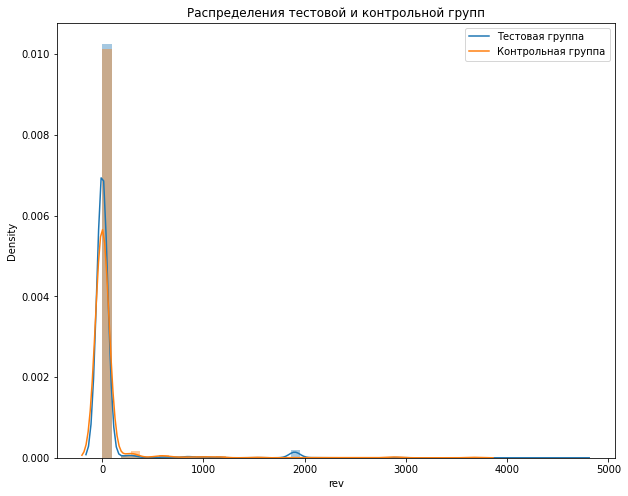

Наблюдений в тестовой группе: 6803
Наблюдений в контрольной группе: 1538
Дисперсии гомогенны




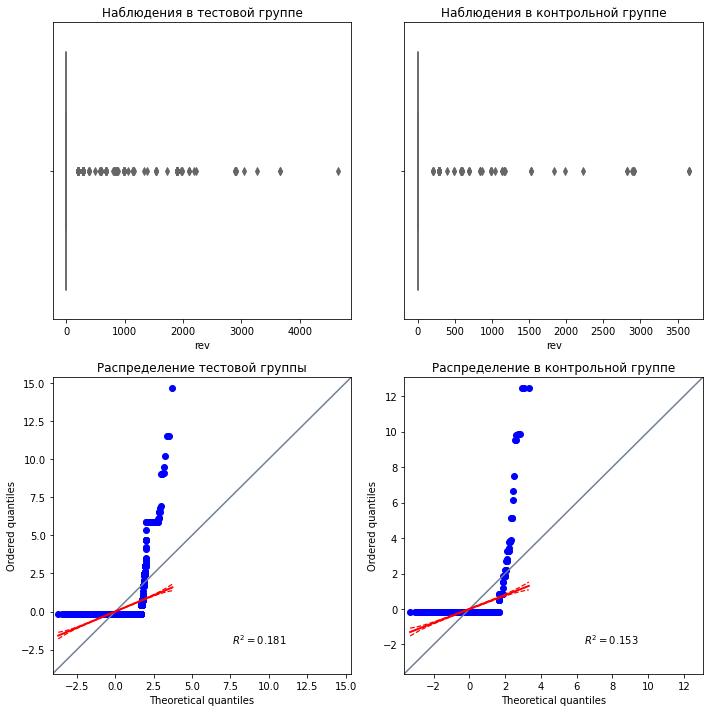

Распределение в обеих группах не принадлежит к нормальному
p_value тестовой группы = 0.0
p_value контрольной группы = 0.0


In [49]:
preparation(test=arpu_test, control=arpu_control)

Ввиду того, что тестируемые группы сильно не равны между собой, однако имеют достаточно<br>
большое количество наболюдений, считаю, что в этом случае будет целесообразнее использовать<br>
**t-test Уэлча** для более достоверного результата

In [50]:
# Используем функцию t-test:
ttest(test=arpu_test, control=arpu_control)

Наблюдений в тестовой группе: 6803
Наблюдений в контрольной группе: 1538
Дисперсии гомогенны
Результаты теста:
Статистика: 1.2863738493797021
p-value: 0.1984358364145106
H0: A==B - Группы не различаются!


In [51]:
arpu_test.mean().round(3)

58.059

In [52]:
arpu_control.mean().round(3)

47.347

In [53]:
active_studs_payments.groupby('grp', as_index=False).rev.mean().round(3)

,grp,rev
0,A,47.347
1,B,58.059


После проведения сравнения метрики ARPU в двух группах с использованием t-теста Уэлча, мы не<br> получили статистически значимую разницу в среднем чеке между контрольной и тестовой группами. 

## Средний чек среди платящих пользователей (ARPPU)
Проанализируем есть ли изменения в среднем чеке среди платящих пользователей.<br>

Сформулируем тестируемые гипотезы:<br>
- **H0:** средние чеки среди платящих пользователей в группах не отличаются между собой<br>
- **H1:** средние чеки среди платящих пользователей в группах статистически значимо различаются


In [54]:
active_studs_payments.head()

,student_id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0


In [55]:
arppu_control = active_studs_payments.query("grp == 'A' and rev > 0").rev
arppu_test = active_studs_payments.query("grp == 'B' and rev > 0").rev

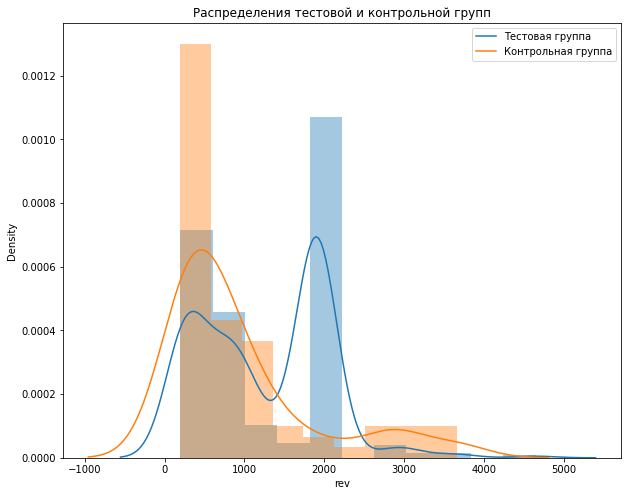

Наблюдений в тестовой группе: 314
Наблюдений в контрольной группе: 78
Дисперсии гомогенны




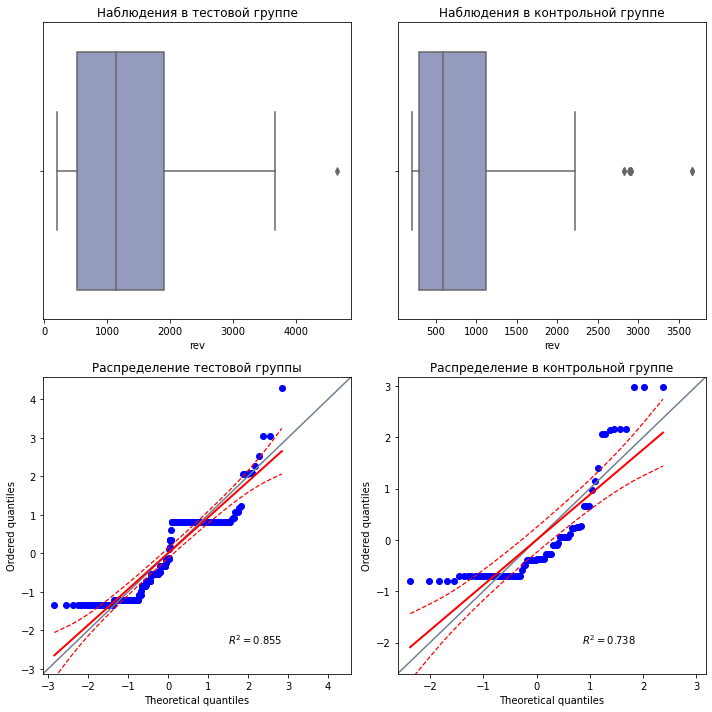

In [56]:
preparation(test=arppu_test, control=arppu_control)

Учитывая разницу в количестве наблюдений в группах, а также размеры выборок, считаю,<br> что наиболее целесообразным
методом проверки гипотез будет метод **bootstrap**


Распределение в обеих группах не принадлежит к нормальному
p_value тестовой группы = 1.5437024585965894e-16
p_value контрольной группы = 1.4986822893803264e-10


100%|██████████| 10000/10000 [00:18<00:00, 543.27it/s]


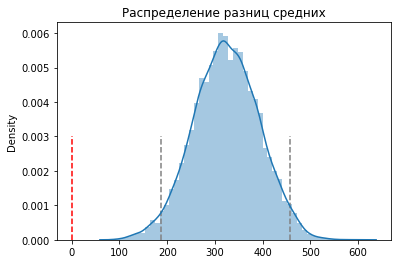

Доверительный интервал: [187.592049   457.55192259]


In [57]:
bootstrap(test=arppu_test, control=arppu_control)

In [58]:
arppu_control.mean().round(3)

933.59

In [59]:
arppu_test.mean().round(3)

1257.879

Т.к. 0 не входит в доверительный интервал, то мы можем отклонить H0<br>
и принять **H1** - средние чеки среди платящих пользователей статистически<br>значимо различаются

## CR<br>

Сформулируем проверяемые гипотезы:<br>

- **H0:** новая механика оплаты не приводит к увеличению конверсии 
- **H1:** новая механика оплаты приводит к статистически значимому увеличению конверсии

In [60]:
# Подготовим данные:
active_users_checks = active_studs.merge(checks, on='student_id', how='left')
active_users_checks.rev.fillna(0, inplace=True)
active_users_checks.head()

,student_id,grp,rev
0,581585,A,0.0
1,5723133,A,0.0
2,3276743,B,0.0
3,4238589,A,0.0
4,4475369,B,0.0


Создадим новую колонку и присвоим статус **payment** пользователям, совершившим оплату<br>
и **none** остальным

In [61]:
active_users_checks['cr'] = active_users_checks['rev'].apply(lambda x: 'none' if x == 0 else 'payment')

In [62]:
active_users_checks.groupby('grp').cr.value_counts(normalize=True)

grp  cr     
A    none       0.949285
     payment    0.050715
B    none       0.953844
     payment    0.046156
Name: cr, dtype: float64

In [63]:
active_users_checks['grp'] = active_users_checks['grp'].astype(str).replace({'B': 'test_group', 'A': 'control_group'})

Таким образом, для проверки наличия различий в метрике CR будем сравнивать категориальные величины.<br>
Для этого воспользуемся методом **Хи-квадрат**, т.к. все наблюдения независимы и их количество<br>
в каждой группе более 5. <br>
Для этого создадим таблицу сопряженности

In [64]:
cross_tab = pd.crosstab(active_users_checks['grp'], active_users_checks['cr'])
cross_tab

cr,none,payment
grp,,
control_group,1460,78
test_group,6489,314


Результат:p_value=0.48625240457231045. Нет оснований отклонить нулевую гипотезу


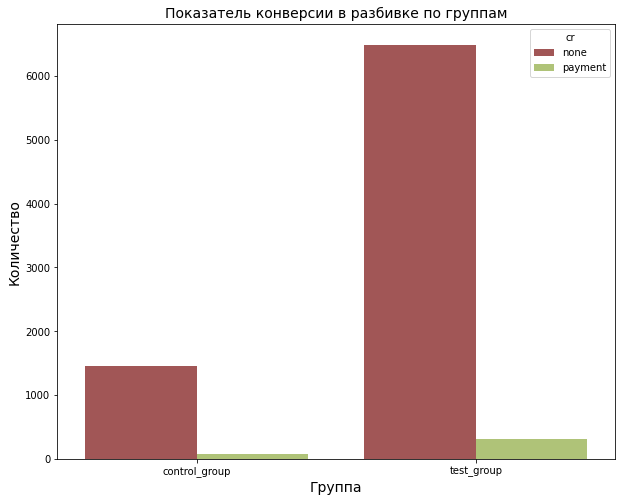

In [65]:
# Применим функцию Хи-квадрата:
chi_square(cross_tab=cross_tab)

По результатам теста, полученное значение **p_value > 0.05**. А значит,<br>
у нас нет оснований отклонить нулевую гипотезу.<br>

Новая механика оплаты не повлияла на увеличение конверсии. 

## Вывод:

Сравнив выбранные метрики в тестовой и контрольной группах, можем сделать следующие выводы:<br>
1. Статистически значимой разницы в **конверсии (CR)** не обнаружено, что может говорить о том,<br>
   что новая механика оплаты не повлияла на увеличение количества платящих пользователей.<br>
2. Не было обнаружено статистически значимой разницы в **среднем чеке (ARPU)** пользователей,<br>
   что указывает на то, что новая механика оплаты не повлияла на показатель среднего чека.<br>
3. Статистически значимое различие в **среднем чеке среди платящих пользователей (ARPPU)**<br>
   в тестовой и контрольной группах. Это может указывать на то, что новая механика оплаты<br>
   положительно влияет на доходность пользователей, которые уже совершили покупку.<br> 
   
Если увеличение ARPPU компенсирует отсутствие значимых изменений в конверсии и ARPU, то в таком<br>
случае можно рассмотреть раскатку обновления на всех пользователей с целью повышения доходности<br>
текущих платящих пользователей. 
Однако, стоит учесть существенную разницу в количестве наблюдений в тестируемых группах,<br>
что может искажать результаты теста. 
 Принимая во внимание все эти факторы, запускать новую механику оплаты на всех пользователей<br> 
по результатам теста не рекомендовано. 

# Задание 2. SQL

Создаем подключение к Clickhouse

In [66]:
connection_default = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'default',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

In [67]:
# Функция для вывода результатов запроса:
def select(sql):
    df = ph.read_clickhouse(query=sql, connection=connection_default)
    return df

### 2.1 Очень усердные ученики.


In [68]:
sql = """ SELECT 
            distinct st_id, count(correct) as beans_solved
        FROM default.peas 
        WHERE correct = 1
        GROUP BY st_id,  toStartOfMonth(timest) 
        HAVING count(correct)  >= 20
        ORDER BY beans_solved desc """

In [69]:
try_harders = select(sql)
try_harders.head()

,st_id,beans_solved
0,700123,126
1,976310,121
2,577659,111
3,234705,81
4,434775,79


In [70]:
print(f'Количество очень усердных студентов составляет {try_harders.shape[0]} человек')

Количество очень усердных студентов составляет 136 человек


### 2.2 Оптимизация воронки

In [71]:
sql = """ WITH revenue as (SELECT st_id, sum(money) as rev 
                           FROM default.final_project_check
                           GROUP BY st_id),
                 
active_user as (SELECT st_id
                FROM default.peas
                WHERE correct = 1
                GROUP BY st_id
                HAVING count(correct) > 10),
                
active_math_user as (SELECT st_id
                     FROM default.peas
                     WHERE correct = 1 and subject = 'Math'
                     GROUP BY st_id
                     HAVING count(st_id) >= 2),
                     
math_revenue as (SELECT st_id, sum(money)
                 FROM default.final_project_check
                 WHERE subject = 'Math'
                 GROUP BY st_id)

SELECT s.test_grp as test_grp,
       round(sum(r.rev) / count(distinct s.st_id), 3) as ARPU,
       round(sum(r.rev) / count(distinct a.st_id), 3) as ARPAU,
       round(count(distinct r.st_id) / count(distinct s.st_id), 3) as CR,
       round(count(distinct r.st_id) / count(distinct a.st_id), 3) as CRAU,
       round(count(distinct mr.st_id) / count(distinct amu.st_id), 3) as CRAMU
FROM default.studs as s 
LEFT JOIN revenue as r on s.st_id = r.st_id 
LEFT JOIN active_user as a on s.st_id = a.st_id
LEFT JOIN active_math_user as amu on s.st_id = amu.st_id
LEFT JOIN math_revenue as mr on s.st_id = mr.st_id
GROUP BY test_grp """

In [72]:
t = select(sql)
t

,test_grp,ARPU,ARPAU,CR,CRAU,CRAMU
0,control,4540.984,10820.312,0.052,0.125,0.180
1,pilot,11508.475,35000.000,0.112,0.340,0.395


# Задание 3. Python

In [73]:
groups = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_groups.csv', sep=';')
checks = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_checks.csv', sep=';')
activity = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_active_studs.csv')

In [74]:
# Переименуем  колонки, чтобы везде были одни названия:
groups.rename(columns={'id': 'student_id'}, inplace=True)

In [75]:
def the_new_data():
    
    groups_add = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-ki-k/FINAL_PROJ/DATA/Проект_2_group_add.csv')
    groups_add.rename(columns={'id': 'student_id'}, inplace=True)
    
    
    groups_all = pd.concat([groups_add, groups])
    active_studs = activity.merge(groups_all, on='student_id', how='left')
    full_df = active_studs.merge(checks, on='student_id', how='left').fillna(0)
    
    # Создаем новую колонку для фиксации факта оплаты (1 - была оплата, 0 - не было):
    full_df['payment'] = np.where(full_df['rev'] > 0, 1, 0)
    metrics = full_df.groupby('grp', as_index=False)\
                     .agg({'payment': 'sum', 'student_id': 'count', 'rev': 'sum'})\
                     .rename(columns={'grp': 'group', 'student_id': 'students', 'rev': 'revenue'})
    
    # Рассчитываем метрики, округляем результат:
    metrics['ARPU'] = round(metrics['revenue'] / metrics['students'], 2)
    metrics['ARPPU'] = round(metrics['revenue'] / metrics['payment'], 2)
    metrics['CR'] = round(metrics['payment'] / metrics['students'], 3)
    
    return metrics

In [76]:
metrics = the_new_data()
metrics

,group,payment,students,revenue,ARPU,ARPPU,CR
0,A,78,1538,72820.0000,47.35,933.59,0.051
1,B,314,6803,394974.0035,58.06,1257.88,0.046


### Функция для визуализации метрик

In [77]:
def plots(metrics):
    f, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
    colors = ['green', 'red']
    sns.set_style("whitegrid")
    sns.set(font_scale=1.2)
    sns.barplot(ax = axes[0], x = 'group', y = 'ARPU', data = metrics, palette=colors)
    sns.barplot(ax = axes[1], x = 'group', y = 'ARPPU', data = metrics, palette=colors)
    sns.barplot(ax = axes[2], x = 'group', y = 'CR', data = metrics, palette=colors)
    plt.tight_layout()
    plt.show()

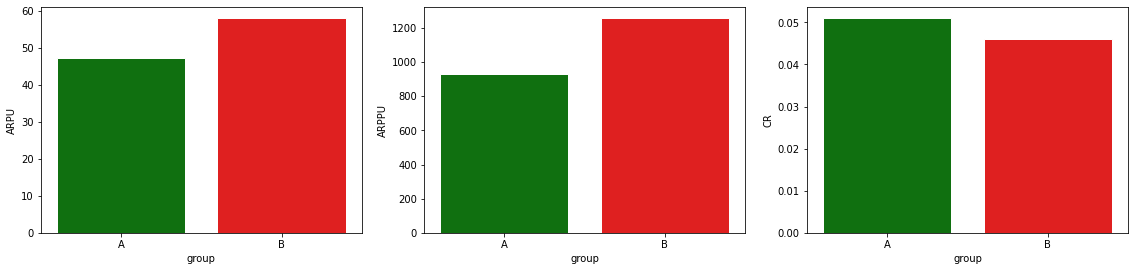

In [78]:
plots(metrics)